In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5b8c8000 @  0x7f2632bf22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
import os
os.listdir("drive/datasets")

['flower_data', 'flower_photos']

In [0]:
!pip install torch torchvision

In [0]:
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
4.0.0


In [0]:
from PIL import Image
import PIL

def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [0]:
import torch
import torchvision
from torchvision import datasets, models, transforms

train_transform = transforms.Compose ([transforms.RandomRotation (30), transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip (),transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) ])

data_transform = transforms.Compose ([transforms.Resize (256),transforms.CenterCrop (224), transforms.ToTensor (),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

#transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

train_dir = 'drive/datasets/flower_data/train'
train_data = datasets.ImageFolder (train_dir, transform = train_transform)

print ('number of training datasets are : ', len (train_data))

number of training datasets are :  6560


In [0]:
#from google.colab import drive
#drive.mount ("drive/datasets/flower_data/train")

In [0]:
print ('number of training images : ', len(train_data))

number of training images :  6560


In [0]:
####################################
#            PROJECT               #
####################################

In [0]:
import os
import numpy as np
import torch 
import PIL

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
train_on_gpu = torch.cuda.is_available ()

if train_on_gpu:
    print ('CUDA is available, training on GPU...')
    
else:
    print ('CUDA not available, training on CPU..')

CUDA is available, training on GPU...


In [0]:
#for validation
valid_dir = 'drive/datasets/flower_data/valid'
os.listdir ('drive/datasets/flower_data')

['valid', 'train', 'cat_to_name.json', 'model.pt']

In [0]:
valid_data = datasets.ImageFolder (valid_dir, transform = data_transform)

In [0]:
batch_size = 64
num_workers = 0


train_loader = torch.utils.data.DataLoader (train_data, batch_size = batch_size, shuffle = True)

valid_loader = torch.utils.data.DataLoader (valid_data, batch_size = batch_size)

In [0]:
import json 
from pprint import pprint

with open ('drive/datasets/flower_data/cat_to_name.json', 'r') as f:
    data = json.load (f)
    
#pprint (data)
classes = data

{'1': 'pink primrose',
 '10': 'globe thistle',
 '100': 'blanket flower',
 '101': 'trumpet creeper',
 '102': 'blackberry lily',
 '11': 'snapdragon',
 '12': "colt's foot",
 '13': 'king protea',
 '14': 'spear thistle',
 '15': 'yellow iris',
 '16': 'globe-flower',
 '17': 'purple coneflower',
 '18': 'peruvian lily',
 '19': 'balloon flower',
 '2': 'hard-leaved pocket orchid',
 '20': 'giant white arum lily',
 '21': 'fire lily',
 '22': 'pincushion flower',
 '23': 'fritillary',
 '24': 'red ginger',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '27': 'prince of wales feathers',
 '28': 'stemless gentian',
 '29': 'artichoke',
 '3': 'canterbury bells',
 '30': 'sweet william',
 '31': 'carnation',
 '32': 'garden phlox',
 '33': 'love in the mist',
 '34': 'mexican aster',
 '35': 'alpine sea holly',
 '36': 'ruby-lipped cattleya',
 '37': 'cape flower',
 '38': 'great masterwort',
 '39': 'siam tulip',
 '4': 'sweet pea',
 '40': 'lenten rose',
 '41': 'barbeton daisy',
 '42': 'daffodil',
 '43': 'sword lily',

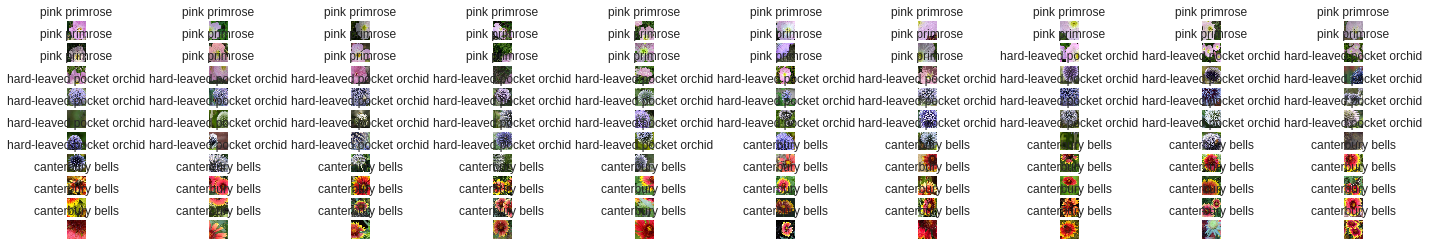

In [0]:
dataiter = iter (train_loader)
images, labels = dataiter.next ()
images = images.numpy ()

fig = plt.figure (figsize = (25, 4))

for idx in np.arange (100):
    ax = fig.add_subplot (10, 100/10, idx +1, xticks=[], yticks=[])
    plt.imshow (np.transpose (images[idx], (1, 2, 0)))
    i = "" + str(labels [idx].numpy()+1) + ""
    ax.set_title(classes[i])

In [0]:



resnet = models.resnet152 (pretrained = True)

for param in resnet.parameters ():
    param.requires_grad = False


print (resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
for params in resnet.layer1.parameters ():
    params.requires_grad = False

for params in resnet.layer2.parameters ():
    params.requires_grad = False 
    
for params in resnet.layer3.parameters ():
    params.requires_grad = False

for params in resnet.layer4.parameters ():
    params.requires_grad = False  
    
    
for params in resnet.conv1.parameters ():
    params.requires_grad = False    

In [0]:
import torch.nn as nn
model = nn.Sequential (nn.Linear (resnet.fc.in_features, 1024),
                       nn.ReLU (),
                       nn.Linear (1024, 512),
                       nn.ReLU (),
                       nn.Linear (512, 102))

resnet.fc = model

for param in resnet.fc.parameters ():
    param.parameters = True

In [0]:
print (resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
if train_on_gpu:
    resnet.cuda ()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss ()


optimizer = optim.Adam (resnet.fc.parameters (), lr = 0.001)

In [0]:
#don't train here




n_epochs = 2

for epoch in range (1, n_epochs + 1):
    
    train_loss = 0.0
    
    
    for i, (data, target) in enumerate (train_loader):
        
        if train_on_gpu:
            data, target = data.cuda (), target.cuda ()
            
        optimizer.zero_grad ()
        
        output = resnet (data)
        
        loss =  criterion (output, target)
        
        loss.backward ()
        
        optimizer.step ()
        
        train_loss += loss.item()
        
        if i % 20 == 19:
            print ('Epoch  %d, Batch  %d, loss  %16f' % (epoch, i+1, train_loss/20))
            train_loss = 0.0

In [0]:
###############################################
#                NEW MODEL                    #
###############################################

In [0]:
n_epochs = 50

valid_loss_min = np.Inf


for epoch in range (n_epochs):
    
    train_loss = 0.0
    valid_loss = 0.0
    
    #Training the model
    
    resnet.train ()
    for data, target in train_loader:
        if train_on_gpu:
            data, target = data.cuda (), target.cuda ()
        optimizer.zero_grad ()
        output = resnet (data)
        loss = criterion (output, target)
        loss.backward ()
        optimizer.step ()
        train_loss += loss.item() * data.size (0)
        
        
    #validate the model
    
    torch.no_grad ()
    resnet.eval ()
    for data, target in valid_loader:
        if train_on_gpu:
            data, target = data.cuda (), target.cuda ()
        output =  resnet (data)
        loss = criterion (output, target)
        valid_loss += loss.item()*data.size (0)
        
                          
    # Print out the losses
    train_loss /= len(train_loader.dataset)
    valid_loss /= len(valid_loader.dataset)
                          
    print ('Epoch: {} \tTraining loss: {:.6f} \tValidation loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))
                          

    checkpoint = {'output_size': 102,
                  'pretrained_network': 'resnet152',
                  'state_dict': resnet.state_dict()}                      
    #save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print ('Validation loss decreased ({:.6f} --> {:.6f}).   saving model...'.format(valid_loss_min, valid_loss))
        torch.save(checkpoint, 'drive/datasets/flower_data/ResnetModel.pt')
        valid_loss_min = valid_loss
                          

Epoch: 1 	Training loss: 1.433218 	Validation loss: 0.807588
Validation loss decreased (inf --> 0.807588).   saving model...
Epoch: 2 	Training loss: 0.968384 	Validation loss: 0.623896
Validation loss decreased (0.807588 --> 0.623896).   saving model...
Epoch: 3 	Training loss: 0.813219 	Validation loss: 0.586824
Validation loss decreased (0.623896 --> 0.586824).   saving model...
Epoch: 4 	Training loss: 0.693109 	Validation loss: 0.490448
Validation loss decreased (0.586824 --> 0.490448).   saving model...
Epoch: 5 	Training loss: 0.626813 	Validation loss: 0.396933
Validation loss decreased (0.490448 --> 0.396933).   saving model...
Epoch: 6 	Training loss: 0.576718 	Validation loss: 0.346167
Validation loss decreased (0.396933 --> 0.346167).   saving model...
Epoch: 7 	Training loss: 0.535656 	Validation loss: 0.341135
Validation loss decreased (0.346167 --> 0.341135).   saving model...
Epoch: 8 	Training loss: 0.510486 	Validation loss: 0.331912
Validation loss decreased (0.34113